In [1]:
import numpy as np
import pandas as pd

import pytz

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astroplan import Observer, FixedTarget

import warnings
warnings.filterwarnings('ignore', category=Warning)


from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [9]:
#setting up the catalog
cat = pd.read_csv('./Data/cat2.csv', skiprows=66, sep=';',
                      usecols=[0,1,6,8,10,11,12,13,14], names=['RA', 
                    'Dec','Mag A','Mag B', 'Period','a'
                    ,'Spectral Type A', 'Spectral Type B', 'Ecc'])

catalog = cat[0:933]
catalog

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc
0,001.3377,+45.8234,8.94,9.04,362.300,6.179,dK6,dM0,0.520
1,001.3377,+45.8234,8.94,9.04,1506.680,11.698,dK6,dM0,0.500
2,001.5449,+58.4400,6.43,7.19,106.830,1.432,G3V,,0.450
3,002.3161,+79.7232,6.70,7.00,456.000,0.924,A7IV,,0.680
4,003.0369,+53.6230,7.30,8.10,68.500,0.225,A7Vn,F2V*,0.790
5,003.0369,+53.6230,7.30,8.10,63.890,0.217,A7Vn,F2V*,0.750
6,003.3440,+26.9895,6.70,7.50,368.000,0.564,G0III,F2IV,0.690
7,004.0687,+76.9558,7.00,7.30,1600.000,1.260,B8Vnn,,0.500
8,004.1809,+36.4891,8.20,8.90,115.049,0.363,F6V,F9V*,0.576
9,004.4915,+44.0056,8.07,11.04,2600.000,41.150,M3V,M6V,0.000


In [110]:
new_cat = pd.read_csv('./Data/new_cat.csv')
new_cat

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
0,1.3377,45.8234,8.94,9.04,362.300,6.179,dK6,dM0,0.520,9.39208,2.96592,FALSE,FALSE,FALSE,FALSE
1,1.3377,45.8234,8.94,9.04,1506.680,11.698,dK6,dM0,0.500,17.547,5.849,FALSE,FALSE,FALSE,FALSE
2,1.5449,58.4400,6.43,7.19,106.830,1.432,G3V,,0.450,2.0764,0.7876,FALSE,FALSE,FALSE,FALSE
3,2.3161,79.7232,6.7,7,456.000,0.924,A7IV,,0.680,1.55232,0.29568,FALSE,FALSE,FALSE,FALSE
4,3.0369,53.6230,7.3,8.1,68.500,0.225,A7Vn,F2V*,0.790,0.40275,0.04725,FALSE,FALSE,FALSE,FALSE
5,3.0369,53.6230,7.3,8.1,63.890,0.217,A7Vn,F2V*,0.750,0.37975,0.05425,FALSE,FALSE,FALSE,FALSE
6,3.3440,26.9895,6.7,7.5,368.000,0.564,G0III,F2IV,0.690,0.95316,0.17484,FALSE,FALSE,FALSE,FALSE
7,4.0687,76.9558,7,7.3,1600.000,1.26,B8Vnn,,0.500,1.89,0.63,FALSE,FALSE,FALSE,FALSE
8,4.1809,36.4891,8.2,8.9,115.049,0.363,F6V,F9V*,0.576,0.572088,0.153912,FALSE,FALSE,FALSE,FALSE
9,4.4915,44.0056,8.07,11.04,2600.000,41.15,M3V,M6V,0.000,41.15,41.15,FALSE,FALSE,FALSE,FALSE


In [3]:
K0V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K0V')]
K0V_catalog

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
23,8.0240,-5.1811,9.2,9.3,10.755,0.169,K0V,K1V*,0.570,0.26533,0.07267,5150,4990,0.552,0.461
24,8.0240,-5.1811,9.2,9.3,21.300,0.19,K0V,K1V*,0.000,0.19,0.19,5150,4990,0.552,0.461
80,24.9330,-56.1931,5.79,5.83,483.660,7.817,K0V,K5V,0.534,11.991278,3.642722,5150,4410,0.552,0.216
167,57.0954,52.0434,9.3,9.6,67.700,0.325,K0V,K1V*,0.170,0.38025,0.26975,5150,4990,0.552,0.461
351,121.0867,12.3016,8.6,8.7,44.750,0.453,K0V,,0.428,0.646884,0.259116,5150,FALSE,0.552,FALSE
465,178.0097,48.0938,9.3,9.5,107.180,0.64,K0V,,0.630,1.0432,0.2368,5150,FALSE,0.552,FALSE
601,241.4177,-32.8565,8.3,8.9,134.000,0.82,K0V,,0.150,0.943,0.697,5150,FALSE,0.552,FALSE
642,258.8527,-26.5651,5.05,5.08,548.700,13.91,K0V,K1V,0.900,26.429,1.391,5150,4990,0.552,0.461
678,271.3562,2.5404,4.2,5.99,88.130,4.545,K0V,K4V,0.500,6.8175,2.2725,5150,4540,0.552,0.263
793,309.3050,75.5875,,10.4,30.450,0.51,K0V,,0.595,0.81345,0.20655,5150,FALSE,0.552,FALSE


In [170]:
sorted_K0V = K0V_catalog.sort_values(['Spectral Type B'])
K0V = sorted_K0V.tail(7)
K0V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
642,258.8527,-26.5651,5.05,5.08,548.700,13.91,K0V,K1V,0.900,26.429,1.391,5150,4990,0.552,0.461
23,8.0240,-5.1811,9.2,9.3,10.755,0.169,K0V,K1V*,0.570,0.26533,0.07267,5150,4990,0.552,0.461
24,8.0240,-5.1811,9.2,9.3,21.300,0.19,K0V,K1V*,0.000,0.19,0.19,5150,4990,0.552,0.461
167,57.0954,52.0434,9.3,9.6,67.700,0.325,K0V,K1V*,0.170,0.38025,0.26975,5150,4990,0.552,0.461
929,0.3536,39.6401,9.2,9.5,227.000,0.85,K0V,K1V*,0.660,1.411,0.289,5150,4990,0.552,0.461
678,271.3562,2.5404,4.2,5.99,88.130,4.545,K0V,K4V,0.500,6.8175,2.2725,5150,4540,0.552,0.263
80,24.9330,-56.1931,5.79,5.83,483.660,7.817,K0V,K5V,0.534,11.991278,3.642722,5150,4410,0.552,0.216


In [5]:
K1V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K1V')]
sorted_K1V = K1V_catalog.sort_values(['Spectral Type B'])
K1V = sorted_K1V.tail(3)
K1V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
36,13.0271,-13.2228,10,10.4,146.1,0.602,K1V,K3V*,0.76,1.05952,0.14448,4990,4690,0.461,0.318
78,25.2268,49.8735,9.4,9.9,87.8,0.3,K1V,K3V*,0.48,0.444,0.156,4990,4690,0.461,0.318
842,327.7642,29.1681,9.2,10.2,21.0,0.16,K1V,K5V*,0.41,0.2256,0.0944,4990,4410,0.461,0.216


In [6]:
K3V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K3V')]
sorted_K3V = K3V_catalog.sort_values(['Spectral Type B'])
K3V = sorted_K3V.tail(3)
K3V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
402,139.4825,28.5814,7.9,8,34.2,0.66,K3V,K3V*,0.35,0.891,0.429,4690,4690,0.318,0.318
74,23.7534,-29.9214,7.1,11.5,115.2,1.443,K3V,M2V,0.22,1.76046,1.12554,4690,3520,0.318,0.032
75,23.7534,-29.9214,7.1,11.5,111.8,1.419,K3V,M2V,0.21,1.71699,1.12101,4690,3520,0.318,0.032


In [7]:
K4V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K4V')]
sorted_K4V = K4V_catalog.sort_values(['Spectral Type B'])
K4V = sorted_K4V.tail(2)
K4V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
105,33.9651,6.6321,9.7,9.8,35.52,0.335,K4V,K4V*,0.66,0.5561,0.1139,4540,4540,0.263,0.263
683,272.3080,-22.1849,9.6,9.6,9.48,0.168,K4V,K4V*,0.40,0.2352,0.1008,4540,4540,0.263,0.263


In [8]:
K5V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K5V')]
sorted_K5V = K5V_catalog.sort_values(['Spectral Type B'])
K5V = sorted_K5V.tail(2)
K5V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
811,316.5743,38.6511,5.22,6.04,722.0,24.65,K5V,K7V,0.401,34.53465,14.76535,4410,4150,0.216,0.145
168,56.3355,-27.8704,8.2,11.8,425.0,2.761,K5V,M3V,0.280,3.53408,1.98792,4410,3400,0.216,0.02


In [9]:
K6V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K6V')]
sorted_K6V = K6V_catalog.sort_values(['Spectral Type B'])
sorted_K6V
#no values here

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B


In [10]:
K7V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K7V')]
sorted_K7V = K7V_catalog.sort_values(['Spectral Type B'])
sorted_K7V
K7V = sorted_K7V.tail(2)
K7V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
117,36.9300,4.4323,9.4,9.6,25.32,0.545,K7V,K7V*,0.21,0.65945,0.43055,4150,4150,0.145,0.145
459,171.2151,-61.6495,7.6,8.6,421.50,5.76,K7V,M0V,0.68,9.6768,1.8432,4150,3840,0.145,0.077


In [11]:
K8V_catalog = new_cat[new_cat['Spectral Type A'].str.match('K8V')]
sorted_K8V = K8V_catalog.sort_values(['Spectral Type B'])
sorted_K8V

#no values for K8V

,RA,Dec,Mag A,Mag B,Period,a,Spectral Type A,Spectral Type B,Ecc,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B


In [12]:
#no values for K9V

In [13]:
#Solving for Spectral Weight Factors
T_star = 5790 #alpha centauri a

a = 1.2456*10**(-4)
b = 1.4612*10**(-8)
c = -7.6345*10**(-12)
d = -1.7511*10**(-15)
T = T_star - 5780
l_sun = 0.97
alpha = a*T + b*T**2 + c*T**3 + d*T**4

W_a = 1/(1+alpha*(l_sun**2))
W_a

0.9988280224596888

In [14]:
#Solving for Spectral Weight Factors
T_star = 5260 #alpha centauri b

a = 1.2456*10**(-4)
b = 1.4612*10**(-8)
c = -7.6345*10**(-12)
d = -1.7511*10**(-15)
T = T_star - 5780
l_sun = 0.97
alpha = a*T + b*T**2 + c*T**3 + d*T**4

W_b = 1/(1+alpha*(l_sun**2))
W_b

1.0596993089817068

In [15]:
L_i = 1.519
W_a
l_star = l_sun*((W_a*L_i)**0.5) #equation (3)
l_star

1.194802108275172

In [111]:
#calculation for l_(x-star), without secondary
T_i = 5790
L_i = 1.1519

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**2)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

1.0404578290955384
1.7908666747782083


In [112]:
#calculation for l_(x-star), without secondary
T_i = 5260
L_i = 0.5

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.7060704921680582
1.2345142964151854


In [232]:
# K0V Stars
#calculation for l_(x-star), without secondary
T_i = 5150
L_i = 0.552

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.746042569376317
1.3100665698191762


In [114]:
# K1V Stars
#calculation for l_(x-star), without secondary
T_i = 4990
L_i = 0.461

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**2)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.6870520061143774
1.2116255235419755


In [115]:
# K3V Stars
#calculation for l_(x-star), without secondary
T_i = 4690
L_i = 0.318

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.5780118483329629
1.0432637295223355


In [116]:
# K4V Stars
#calculation for l_(x-star), without secondary
T_i = 4540
L_i = 0.263

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.5286002610252435
0.9679390211951963


In [117]:
# K5V Stars
#calculation for l_(x-star), without secondary
T_i = 4410
L_i = 0.216

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l
print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.4811426104438329
0.8952311710865238


In [118]:
# K7V Stars
#calculation for l_(x-star), without secondary
T_i = 4150
L_i = 0.145

#inner HZ
def l_in(T_i, L_i):
    T = T_i - 5780
    l_xsun = 0.97
    
    #coefficient for the inner
    a_in = 1.2456*10**(-4)
    b_in = 1.4612*10**(-8)
    c_in = -7.6345*10**(-12)
    d_in = -1.7511*10**(-15)
    
    a_x = T * (a_in + b_in*T + (c_in*T**2) + (d_in*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

#outer HZ
def l_out(T_i, L_i):
    T = T_i - 5780
    l_xsun = 1.67
    
    #coeffiecient for the outer
    a_out = 5.9578*10**(-5)
    b_out = 1.6707*10**(-9)
    c_out = -3.0058*10**(-12)
    d_out = -5.1925*10**(-15)
    
    a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
    W = 1/(1+a_x*l_xsun**2)   #equation (6)
    l = l_xsun*((W*L_i)**0.5) #equation (3)
    
    return l

print(l_in(T_i, L_i))
print(l_out(T_i, L_i))

0.3971498949117599
0.7736572048201452


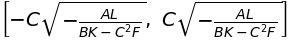

In [119]:
from sympy import *
init_printing(use_latex=True)
F,A,L,X,B,K,C  = symbols('F A L X B K C')
solve((A*L)/(X**2) + (B*K)/(C**2) - F,X)

In [120]:
T_i = 4150
L_i = 0.145

T = T_i - 5780
l_xsun = 0.97
    
#coeffiecient for the outer
a_out = 5.9578*10**(-5)
b_out = 1.6707*10**(-9)
c_out = -3.0058*10**(-12)
d_out = -5.1925*10**(-15)
    
a_x = T * (a_out + b_out*T + (c_out*T**2) + (d_out*T**3)) #equation (4)
W = 1/(1+a_x*l_xsun**2)   #equation (6)

print(W)


1.1228844590886102


# Calculating Min Habitable Zone with Binary Star (outer limit)


In [212]:
K0V["Temperature A"] = pd.to_numeric(K0V["Temperature A"])
K0V["Temperature B"] = pd.to_numeric(K0V["Temperature B"])
K0V["Luminosity A"] = pd.to_numeric(K0V["Luminosity A"])
K0V["Luminosity B"] = pd.to_numeric(K0V["Luminosity B"])
K0V["P"] = pd.to_numeric(K0V["P"])

In [214]:
# K0V Stars
# P = a(1+e)
# Outer Limit

T_ipr = K0V["Temperature A"]
T_isec = K0V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K0V["Luminosity A"]
Lsec = K0V["Luminosity B"]

P = K0V["P"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

#Inner_dist = (((F_in - (Wsec*Lsec)/P**2)/(Wpr*Lpr))**(-1))**(1/2)
Inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Inner_dist

642    2.694711
23          NaN
24          NaN
167         NaN
929         NaN
678    1.447982
80     1.351516
dtype: float64

In [215]:
K1V["Temperature A"] = pd.to_numeric(K1V["Temperature A"])
K1V["Temperature B"] = pd.to_numeric(K1V["Temperature B"])
K1V["Luminosity A"] = pd.to_numeric(K1V["Luminosity A"])
K1V["Luminosity B"] = pd.to_numeric(K1V["Luminosity B"])
K1V["P"] = pd.to_numeric(K1V["P"])

In [216]:
# K1V Stars
# P = a(1+e)
# Outer Limit

T_ipr = K1V["Temperature A"]
T_isec = K1V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K1V["Luminosity A"]
Lsec = K1V["Luminosity B"]

P = K1V["P"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

#Inner_dist = (((F_in - (Wsec*Lsec)/P**2)/(Wpr*Lpr))**(-1))**(1/2)
Inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Inner_dist

36    NaN
78    NaN
842   NaN
dtype: float64

In [217]:
K3V["Temperature A"] = pd.to_numeric(K3V["Temperature A"])
K3V["Temperature B"] = pd.to_numeric(K3V["Temperature B"])
K3V["Luminosity A"] = pd.to_numeric(K3V["Luminosity A"])
K3V["Luminosity B"] = pd.to_numeric(K3V["Luminosity B"])
K3V["P"] = pd.to_numeric(K3V["P"])

In [219]:
# K3V Stars
# P = a(1+e)
# Outer Limit

T_ipr = K3V["Temperature A"]
T_isec = K3V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K3V["Luminosity A"]
Lsec = K3V["Luminosity B"]

P = K3V["P"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

#Inner_dist = (((F_in - (Wsec*Lsec)/P**2)/(Wpr*Lpr))**(-1))**(1/2)
Inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Inner_dist

402         NaN
74     1.160483
75     1.161599
dtype: float64

In [220]:
K4V["Temperature A"] = pd.to_numeric(K4V["Temperature A"])
K4V["Temperature B"] = pd.to_numeric(K4V["Temperature B"])
K4V["Luminosity A"] = pd.to_numeric(K4V["Luminosity A"])
K4V["Luminosity B"] = pd.to_numeric(K4V["Luminosity B"])
K4V["P"] = pd.to_numeric(K4V["P"])

In [221]:
# K4V Stars
# P = a(1+e)
# Outer Limit

T_ipr = K4V["Temperature A"]
T_isec = K4V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K4V["Luminosity A"]
Lsec = K4V["Luminosity B"]

P = K4V["P"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

#Inner_dist = (((F_in - (Wsec*Lsec)/P**2)/(Wpr*Lpr))**(-1))**(1/2)
Inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Inner_dist

105   NaN
683   NaN
dtype: float64

In [222]:
K5V["Temperature A"] = pd.to_numeric(K5V["Temperature A"])
K5V["Temperature B"] = pd.to_numeric(K5V["Temperature B"])
K5V["Luminosity A"] = pd.to_numeric(K5V["Luminosity A"])
K5V["Luminosity B"] = pd.to_numeric(K5V["Luminosity B"])
K5V["P"] = pd.to_numeric(K5V["P"])

In [223]:
# K5V Stars
# P = a(1+e)
# Outer Limit

T_ipr = K5V["Temperature A"]
T_isec = K5V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K5V["Luminosity A"]
Lsec = K5V["Luminosity B"]

P = K5V["P"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

#Inner_dist = (((F_in - (Wsec*Lsec)/P**2)/(Wpr*Lpr))**(-1))**(1/2)
Inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Inner_dist

811    0.896463
168    0.918746
dtype: float64

In [185]:
K7V["Temperature A"] = pd.to_numeric(K7V["Temperature A"])
K7V["Temperature B"] = pd.to_numeric(K7V["Temperature B"])
K7V["Luminosity A"] = pd.to_numeric(K7V["Luminosity A"])
K7V["Luminosity B"] = pd.to_numeric(K7V["Luminosity B"])
K7V["P"] = pd.to_numeric(K7V["P"])

In [224]:
# K7V Stars
# P = a(1+e)
# Outer Limit

T_ipr = K7V["Temperature A"]
T_isec = K7V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K7V["Luminosity A"]
Lsec = K7V["Luminosity B"]

P = K7V["P"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

#Inner_dist = (((F_in - (Wsec*Lsec)/P**2)/(Wpr*Lpr))**(-1))**(1/2)
Inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Inner_dist

117        NaN
459    0.82223
dtype: float64

# Calculating Min Habitable Zone of Binary System (inner limit)

In [226]:
# K0V Stars
# P = a(1+e)
# Inner Limit

T_ipr = K0V["Temperature A"]
T_isec = K0V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K0V["Luminosity A"]
Lsec = K0V["Luminosity B"]

P = K0V["P"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

Outer_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Outer_dist

642    0.858010
23          NaN
24          NaN
167         NaN
929         NaN
678    0.767083
80     0.752637
dtype: float64

In [227]:
# K1V Stars
# P = a(1+e)
# Inner Limit

T_ipr = K1V["Temperature A"]
T_isec = K1V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K1V["Luminosity A"]
Lsec = K1V["Luminosity B"]

P = K1V["P"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

Outer_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Outer_dist

36    NaN
78    NaN
842   NaN
dtype: float64

In [229]:
# K3V Stars
# P = a(1-e)
# Inner Limit

T_ipr = K3V["Temperature A"]
T_isec = K3V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K3V["Luminosity A"]
Lsec = K3V["Luminosity B"]

P = K3V["P"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

Outer_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Outer_dist

402         NaN
74     0.586313
75     0.586382
dtype: float64

In [230]:
# K4V Stars
# P = a(1-e)
# Inner Limit

T_ipr = K4V["Temperature A"]
T_isec = K4V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K4V["Luminosity A"]
Lsec = K4V["Luminosity B"]

P = K4V["P"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

Outer_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Outer_dist

105   NaN
683   NaN
dtype: float64

In [231]:
# K5V Stars
# P = a(1+e)
# Inner Limit

T_ipr = K5V["Temperature A"]
T_isec = K5V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K5V["Luminosity A"]
Lsec = K5V["Luminosity B"]

P = K5V["P"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

Outer_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Outer_dist

811    0.481317
168    0.482507
dtype: float64

In [192]:
# K7V Stars
# P = a(1+e)
# Inner Limit

T_ipr = K7V["Temperature A"]
T_isec = K7V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K7V["Luminosity A"]
Lsec = K7V["Luminosity B"]

P = K7V["P"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

Outer_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(P)**2))**(-1))**(1/2)
Outer_dist

117    1.028413
459    0.402206
dtype: float64

In [140]:
without_sec = pd.read_csv('./Data/Without_Sec.csv')
without_sec

,K-Type Main-Sequence Stars (K_V),Inner HZ Limit (AU),Outer HZ Limit (AU)
0,K0V,0.745,1.310
1,K1V,0.687,1.210
2,K3V,0.577,1.030
3,K4V,0.527,0.947
4,K5V,0.480,0.866
5,K7V,0.395,0.721


In [141]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


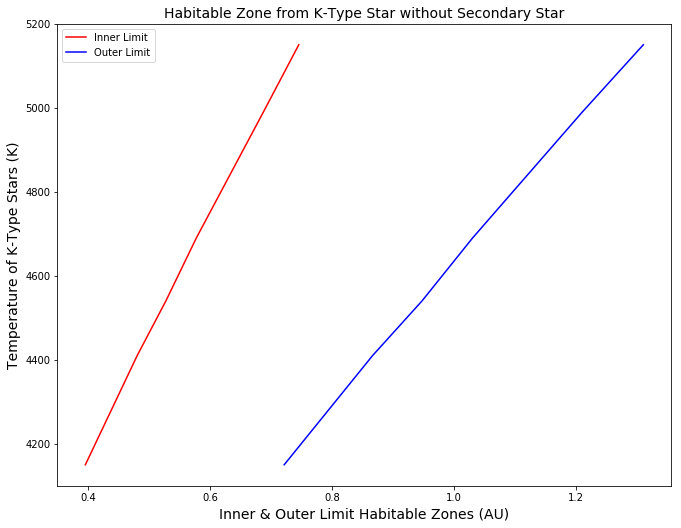

In [142]:
#Single Star

fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5) 

plt.plot([0.745, 0.687, 0.577, 0.527, 0.480, 0.395], [5150, 4990, 4690, 4540, 4410, 4150], 'r-', label = 'Inner Limit' )
plt.plot([1.310, 1.210, 1.030, 0.947, 0.866, 0.721], [5150, 4990, 4690, 4540, 4410, 4150], 'b-', label = 'Outer Limit')
plt.xlabel("Inner & Outer Limit Habitable Zones (AU)", fontsize=14)
plt.ylabel("Temperature of K-Type Stars (K)", fontsize=14)
plt.title("Habitable Zone from K-Type Star without Secondary Star", fontsize=14)
plt.legend();


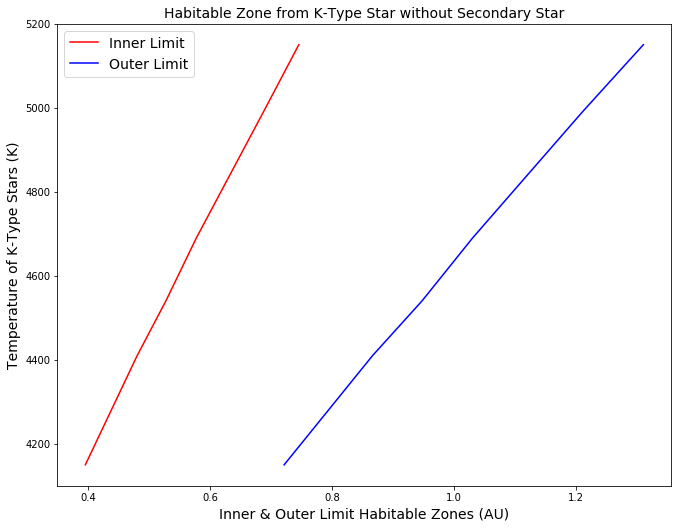

In [143]:
#Binary Stars

fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5) 

plt.plot([0.745, 0.687, 0.577, 0.527, 0.480, 0.395], [5150, 4990, 4690, 4540, 4410, 4150], 'r-', label = 'Inner Limit' )
plt.plot([1.310, 1.210, 1.030, 0.947, 0.866, 0.721], [5150, 4990, 4690, 4540, 4410, 4150], 'b-', label = 'Outer Limit')
plt.xlabel("Inner & Outer Limit Habitable Zones (AU)", fontsize=14)
plt.ylabel("Temperature of K-Type Stars (K)", fontsize=14)
plt.title("Habitable Zone from K-Type Star without Secondary Star", fontsize=14)
plt.legend(fontsize=14);


In [144]:
inner = new_data['HZ Outer Limit']
print(inner)

0     1.309778
1          NaN
2          NaN
3          NaN
4     2.553084
5     1.321222
6     1.311829
7     5.204402
8          NaN
9          NaN
10         NaN
11    1.050911
12    1.051996
13         NaN
14         NaN
15    0.866484
16    0.868907
17         NaN
18    0.722096
Name: HZ Outer Limit, dtype: float64


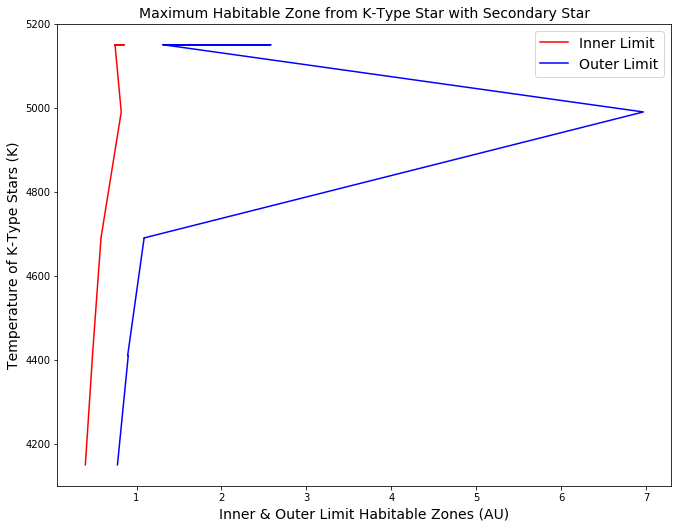

In [233]:
#Binary Stars

fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5) 

plt.plot([0.746295, 0.85414, 0.748295, 0.746644, 0.819789, 0.581362, 0.581536, 0.481174, 0.481573, 0.39733], [5150, 5150, 5150, 5150, 4990, 4690, 4690, 4410, 4410, 4150], 'r-', label = 'Inner Limit' )
plt.plot([1.311454, 2.579948, 1.323474, 1.313733, 6.965859, 1.086737, 1.089115, 0.895456, 0.902475, 0.775271], [5150, 5150, 5150, 5150, 4990, 4690, 4690, 4410, 4410, 4150], 'b-', label = 'Outer Limit')
plt.xlabel("Inner & Outer Limit Habitable Zones (AU)", fontsize=14)
plt.ylabel("Temperature of K-Type Stars (K)", fontsize=14)
plt.title("Maximum Habitable Zone from K-Type Star with Secondary Star", fontsize=14)
plt.legend(fontsize=14);


# Calculating Max HZ of Binary System (inner)


In [194]:
K0V["Temperature A"] = pd.to_numeric(K0V["Temperature A"])
K0V["Temperature B"] = pd.to_numeric(K0V["Temperature B"])
K0V["Luminosity A"] = pd.to_numeric(K0V["Luminosity A"])
K0V["Luminosity B"] = pd.to_numeric(K0V["Luminosity B"])
K0V["A"] = pd.to_numeric(K0V["A"])

In [195]:
# K0V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K0V["Temperature A"]
T_isec = K0V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K0V["Luminosity A"]
Lsec = K0V["Luminosity B"]

A = K0V["A"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist


642    0.746295
23          NaN
24          NaN
167         NaN
929    0.854140
678    0.748295
80     0.746644
dtype: float64

In [196]:
K1V["Temperature A"] = pd.to_numeric(K1V["Temperature A"])
K1V["Temperature B"] = pd.to_numeric(K1V["Temperature B"])
K1V["Luminosity A"] = pd.to_numeric(K1V["Luminosity A"])
K1V["Luminosity B"] = pd.to_numeric(K1V["Luminosity B"])
K1V["A"] = pd.to_numeric(K1V["A"])

In [197]:
# K1V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K1V["Temperature A"]
T_isec = K1V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K1V["Luminosity A"]
Lsec = K1V["Luminosity B"]

A = K1V["A"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

36     0.819789
78          NaN
842         NaN
dtype: float64

In [198]:
K3V["Temperature A"] = pd.to_numeric(K3V["Temperature A"])
K3V["Temperature B"] = pd.to_numeric(K3V["Temperature B"])
K3V["Luminosity A"] = pd.to_numeric(K3V["Luminosity A"])
K3V["Luminosity B"] = pd.to_numeric(K3V["Luminosity B"])
K3V["A"] = pd.to_numeric(K3V["A"])

In [199]:
# K3V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K3V["Temperature A"]
T_isec = K3V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K3V["Luminosity A"]
Lsec = K3V["Luminosity B"]

A = K3V["A"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

402    0.759518
74     0.581362
75     0.581536
dtype: float64

In [200]:
K4V["Temperature A"] = pd.to_numeric(K4V["Temperature A"])
K4V["Temperature B"] = pd.to_numeric(K4V["Temperature B"])
K4V["Luminosity A"] = pd.to_numeric(K4V["Luminosity A"])
K4V["Luminosity B"] = pd.to_numeric(K4V["Luminosity B"])
K4V["A"] = pd.to_numeric(K4V["A"])

In [201]:
# K4V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K4V["Temperature A"]
T_isec = K4V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K4V["Luminosity A"]
Lsec = K4V["Luminosity B"]

A = K4V["A"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

105    1.702006
683         NaN
dtype: float64

In [202]:
K5V["Temperature A"] = pd.to_numeric(K5V["Temperature A"])
K5V["Temperature B"] = pd.to_numeric(K5V["Temperature B"])
K5V["Luminosity A"] = pd.to_numeric(K5V["Luminosity A"])
K5V["Luminosity B"] = pd.to_numeric(K5V["Luminosity B"])
K5V["A"] = pd.to_numeric(K5V["A"])

In [203]:
# K5V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K5V["Temperature A"]
T_isec = K5V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K5V["Luminosity A"]
Lsec = K5V["Luminosity B"]

A = K5V["A"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

811    0.481174
168    0.481573
dtype: float64

In [204]:
K7V["Temperature A"] = pd.to_numeric(K7V["Temperature A"])
K7V["Temperature B"] = pd.to_numeric(K7V["Temperature B"])
K7V["Luminosity A"] = pd.to_numeric(K7V["Luminosity A"])
K7V["Luminosity B"] = pd.to_numeric(K7V["Luminosity B"])
K7V["A"] = pd.to_numeric(K7V["A"])

In [205]:
# K7V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K7V["Temperature A"]
T_isec = K7V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 0.97
F_in = L_sun/(Lx_sun_in**2)

Lpr = K7V["Luminosity A"]
Lsec = K7V["Luminosity B"]

A = K7V["A"]

a_in = 1.2456*10**(-4)
b_in = 1.4612*10**(-8)
c_in = -7.6345*10**(-12)
d_in = -1.7511*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

117    0.497487
459    0.397330
dtype: float64

# Calculating Max HZ of Binary System (outer)


In [206]:
# K0V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K0V["Temperature A"]
T_isec = K0V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K0V["Luminosity A"]
Lsec = K0V["Luminosity B"]

A = K0V["A"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

642    1.311454
23          NaN
24          NaN
167         NaN
929    2.579948
678    1.323474
80     1.313733
dtype: float64

In [207]:
# K1V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K1V["Temperature A"]
T_isec = K1V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K1V["Luminosity A"]
Lsec = K1V["Luminosity B"]

A = K1V["A"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

36     6.965859
78          NaN
842         NaN
dtype: float64

In [211]:
# K3V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K3V["Temperature A"]
T_isec = K3V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K3V["Luminosity A"]
Lsec = K3V["Luminosity B"]

A = K3V["A"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

402         NaN
74     1.086737
75     1.089115
dtype: float64

In [208]:
# K4V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K4V["Temperature A"]
T_isec = K4V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K4V["Luminosity A"]
Lsec = K4V["Luminosity B"]

A = K4V["A"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

105   NaN
683   NaN
dtype: float64

In [162]:
# K5V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K5V["Temperature A"]
T_isec = K5V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K5V["Luminosity A"]
Lsec = K5V["Luminosity B"]

A = K5V["A"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

811    0.895456
168    0.902475
dtype: float64

In [209]:
# K7V Stars
# A = a(1-e)
# Inner Limit

T_ipr = K7V["Temperature A"]
T_isec = K7V["Temperature B"]

T_pr = T_ipr - 5780
T_sec = T_isec - 5780

L_sun = 1
Lx_sun_in = 1.67
F_in = L_sun/(Lx_sun_in**2)

Lpr = K7V["Luminosity A"]
Lsec = K7V["Luminosity B"]

A = K7V["A"]

a_in = 5.9578*10**(-5)
b_in = 1.6707*10**(-9)
c_in = -3.0058*10**(-12)
d_in = -5.1925*10**(-15)

a_x_pr = T_pr * (a_in + b_in*T_pr + (c_in*T_pr**2) + (d_in*T_pr**3)) 
a_x_sec = T_sec * (a_in + b_in*T_sec + (c_in*T_sec**2) + (d_in*T_sec**3))


Wpr = 1/(1+a_x_pr*Lx_sun_in**2)
Wsec = 1/(1+a_x_sec*Lx_sun_in**2)

inner_dist = ((F_in/(Wpr*Lpr) - (Wsec*Lsec)/(Lpr*Wpr*(A)**2))**(-1))**(1/2)
inner_dist

117         NaN
459    0.775271
dtype: float64

In [164]:
official = pd.read_csv('./Data/Project_data.csv')
official

,Spectral Type A,Spectral Type B,RA,DEC,Eccentricity,Semi Major Axis,A,P,Temperature A,Temperature B,Luminosity A,Luminosity B
0,K0V,K1V,258.8527,-26.5651,0.900,13.910,26.429000,1.391000,5150,4990,0.552,0.461
1,K0V,K1V,8.0240,-5.1811,0.570,0.169,0.265330,0.072670,5150,4990,0.552,0.461
2,K0V,K1V,8.0240,-5.1811,0.000,0.190,0.190000,0.190000,5150,4990,0.552,0.461
3,K0V,K1V,57.0954,52.0434,0.170,0.325,0.380250,0.269750,5150,4990,0.552,0.461
4,K0V,K1V,0.3536,39.6401,0.660,0.850,1.411000,0.289000,5150,4990,0.552,0.461
5,K0V,K4V,271.3562,2.5404,0.500,4.545,6.817500,2.272500,5150,4540,0.552,0.263
6,K0V,K5V,24.9330,-56.1931,0.534,7.817,11.991278,3.642722,5150,4410,0.552,0.216
7,K1V,K3V,13.0271,-13.2228,0.760,0.602,1.059520,0.144480,4990,4690,0.461,0.318
8,K1V,K3V,25.2268,49.8735,0.480,0.300,0.444000,0.156000,4990,4690,0.461,0.318
9,K1V,K5V,327.7642,29.1681,0.410,0.160,0.225600,0.094400,4990,4410,0.461,0.318


In [234]:
max_data = pd.read_csv('./Data/Max_data.csv')
max_data

,Spectral Type A,Spectral Type B,RA,DEC,Eccentricity,Semi Major Axis,HZ Inner Limit,HZ Outer Limit
0,K0V,K1V,258.8527,-26.5651,0.900,13.910,0.746295,1.311454
1,K0V,K1V,8.0240,-5.1811,0.570,0.169,NaN,NaN
2,K0V,K1V,8.0240,-5.1811,0.000,0.190,NaN,NaN
3,K0V,K1V,57.0954,52.0434,0.170,0.325,NaN,NaN
4,K0V,K1V,0.3536,39.6401,0.660,0.850,0.854140,2.579948
5,K0V,K4V,271.3562,2.5404,0.500,4.545,0.748295,1.323474
6,K0V,K5V,24.9330,-56.1931,0.534,7.817,0.746644,1.313733
7,K1V,K3V,13.0271,-13.2228,0.760,0.602,0.819789,6.965859
8,K1V,K3V,25.2268,49.8735,0.480,0.300,NaN,NaN
9,K1V,K5V,327.7642,29.1681,0.410,0.160,NaN,NaN


In [235]:
min_data = pd.read_csv('./Data/Min_data.csv')
min_data

,Spectral Type A,Spectral Type B,RA,DEC,Eccentricity,Semi Major Axis,HZ Inner Limit,HZ Outer Limit
0,K0V,K1V,258.8527,-26.5651,0.900,13.910,0.858010,2.694711
1,K0V,K1V,8.0240,-5.1811,0.570,0.169,NaN,NaN
2,K0V,K1V,8.0240,-5.1811,0.000,0.190,NaN,NaN
3,K0V,K1V,57.0954,52.0434,0.170,0.325,NaN,NaN
4,K0V,K1V,0.3536,39.6401,0.660,0.850,NaN,NaN
5,K0V,K4V,271.3562,2.5404,0.500,4.545,0.767083,1.447982
6,K0V,K5V,24.9330,-56.1931,0.534,7.817,0.752637,1.351516
7,K1V,K3V,13.0271,-13.2228,0.760,0.602,NaN,NaN
8,K1V,K3V,25.2268,49.8735,0.480,0.300,NaN,NaN
9,K1V,K5V,327.7642,29.1681,0.410,0.160,NaN,NaN


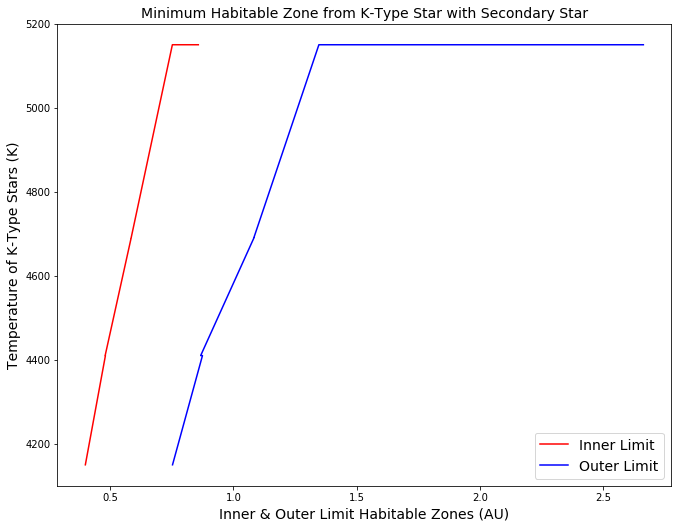

In [167]:
#Binary Stars

fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5) 

plt.plot([0.857794, 0.76688, 0.752488, 0.585143, 0.585208, 0.47973, 0.480839, 0.399391], [5150, 5150, 5150, 4690, 4690, 4410, 4410, 4150], 'r-', label = 'Inner Limit' )
plt.plot([2.663679, 1.439468, 1.347047, 1.08286, 1.083318, 0.86733, 0.87463, 0.753151], [5150, 5150, 5150, 4690, 4690, 4410, 4410, 4150], 'b-', label = 'Outer Limit')
plt.xlabel("Inner & Outer Limit Habitable Zones (AU)", fontsize=14)
plt.ylabel("Temperature of K-Type Stars (K)", fontsize=14)
plt.title("Minimum Habitable Zone from K-Type Star with Secondary Star", fontsize=14)
plt.legend(fontsize=14);


In [3]:
temp_lum = pd.read_csv('./Data/Temp_Lum.csv')
temp_lum

,K-Type Main-Sequence Stars (K_V),Effective Temperature (K),Luminosity (L/Lsun)
0,K0V,5150,0.552
1,K1V,4990,0.461
2,K3V,4690,0.318
3,K4V,4540,0.263
4,K5V,4410,0.216
5,K7V,4150,0.145


In [5]:
coeff = pd.read_csv('./Data/Coeff.csv')
coeff

,Coefficients,Inner Limit Runaway Greenhouse,Outer Limit Runaway Greenhouse
0,l_x-Sun,0.97,1.67
1,a_x,1.2456 × 10−4,5.9578 × 10−5
2,b_x,1.4612 × 10−8,1.6707 × 10−9
3,c_x,−7.6345 × 10−12,−3.0058 × 10−12
4,d_x,−1.7511 × 10−15,−5.1925 × 10−16
